In [10]:
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
nifty_50_data = pd.read_csv ('Final-50-stocks.csv')

nifty_50_data.head()


,DATE,TATASTEEL,WIPRO,TITAN,ULTRACEMO,TECHM,RELIANCE,SHREECEM,SUNPHARMA,TATAMOTORS,...,BPCL,BRITANNIA,ADANIPORTS,BAJAJFINSERV,BAJAJFINANCE,BHARTIARTL,AXISBANK,BAJAJ-AUTO,ASIANPAINT,UPL
0,2010-01-11,591.90,423.70,3792.50,6737.95,735.60,1093.20,2116.10,2190.70,1170.60,...,754.80,413.15,NaN,467.25,798.60,335.30,1513.60,1530.75,2705.05,NaN
1,2010-01-12,613.55,414.70,3781.90,5443.70,671.15,988.80,2094.10,448.65,1286.75,...,697.95,410.30,NaN,481.65,713.30,350.55,1424.45,1571.20,2680.40,NaN
2,2010-02-11,599.05,433.85,3818.70,6735.25,724.55,1074.85,2164.55,2190.45,1154.25,...,772.75,413.60,NaN,472.10,806.40,329.25,1526.60,1548.75,2792.80,NaN
3,2010-02-12,622.75,426.05,3784.20,5368.40,676.35,1011.15,2022.35,452.90,1320.15,...,685.80,412.45,NaN,484.35,741.85,346.10,1455.35,1574.30,2651.85,NaN
4,2010-03-11,609.60,434.70,3833.05,6858.65,732.50,1065.30,2261.40,2249.30,1185.55,...,765.60,415.75,NaN,480.15,799.25,328.40,1536.10,1582.35,2694.90,NaN


In [15]:
average_daily_change_price=[]
l=[]
stocks=list(nifty_50_data.columns)
for col in stocks:
    if(col=='DATE'):
        continue
    for j in range(len(col)-1):
        price_change=nifty_50_data[col][j+1]-nifty_50_data[col][j]
        l.append(price_change)
    average_daily_change_price.append(sum(l)/len(l))
    l=[]

df=pd.DataFrame({'Stock':stocks[1:],'Daily Avg Price Change':average_daily_change_price})

df

,Stock,Daily Avg Price Change
0,TATASTEEL,5.393750
1,WIPRO,2.750000
2,TITAN,10.137500
3,ULTRACEMO,-155.981250
4,TECHM,-0.775000
5,RELIANCE,1.785714
6,SHREECEM,25.764286
7,SUNPHARMA,-216.843750
8,TATAMOTORS,18.311111
9,TCS,-1.975000


In [16]:
# Average Daily, Monthly and Yearly Rate of Return

average_daily_rate_of_return=[]
average_monthly_rate_of_return=[]
average_yearly_rate_of_return=[]
l=[]
q=[]
r=[]
stocks=list(nifty_50_data.columns)
for col in stocks:
    if(col=='DATE'):
        continue
    for j in range(len(col)-1):
        price_change=nifty_50_data[col][j+1]-nifty_50_data[col][j]
        rate_of_change=(100*price_change)/nifty_50_data[col][j]
        l.append(rate_of_change)
    for j in range(0,len(col),30):
        price_change=nifty_50_data[col][j+30]-nifty_50_data[col][j]
        rate_of_change=(100*price_change)/nifty_50_data[col][j]
        q.append(rate_of_change)
    for j in range(0,len(col),365):
        price_change=nifty_50_data[col][j+365]-nifty_50_data[col][j]
        rate_of_change=(100*price_change)/nifty_50_data[col][j]
        r.append(rate_of_change)
    
    average_daily_rate_of_return.append(sum(l)/len(l))
    average_monthly_rate_of_return.append(sum(q)/len(q))
    average_yearly_rate_of_return.append(sum(r)/len(r))
    l=[]
    q=[]
    r=[]


df['Avg Daily Rate of Return'] = pd.Series(average_daily_rate_of_return)
df['Avg Monthly Rate of Return'] = pd.Series(average_monthly_rate_of_return)
df['Avg Yearly Rate of Return'] = pd.Series(average_yearly_rate_of_return)

df

,Stock,Daily Avg Price Change,Avg Daily Rate of Return,Avg Monthly Rate of Return,Avg Yearly Rate of Return
0,TATASTEEL,5.393750,0.907015,5.566819,-23.669539
1,WIPRO,2.750000,0.681518,-1.274487,-6.832665
2,TITAN,10.137500,0.270250,0.508899,-93.848385
3,ULTRACEMO,-155.981250,-0.591396,-4.730667,-33.943559
4,TECHM,-0.775000,0.211112,-7.150625,-0.625340
5,RELIANCE,1.785714,0.417311,-7.404866,-32.834797
6,SHREECEM,25.764286,1.508132,0.082699,44.955342
7,SUNPHARMA,-216.843750,108.908987,1.832748,-71.073173
8,TATAMOTORS,18.311111,1.873324,4.877840,-79.822313
9,TCS,-1.975000,-0.146914,-1.357509,18.459275


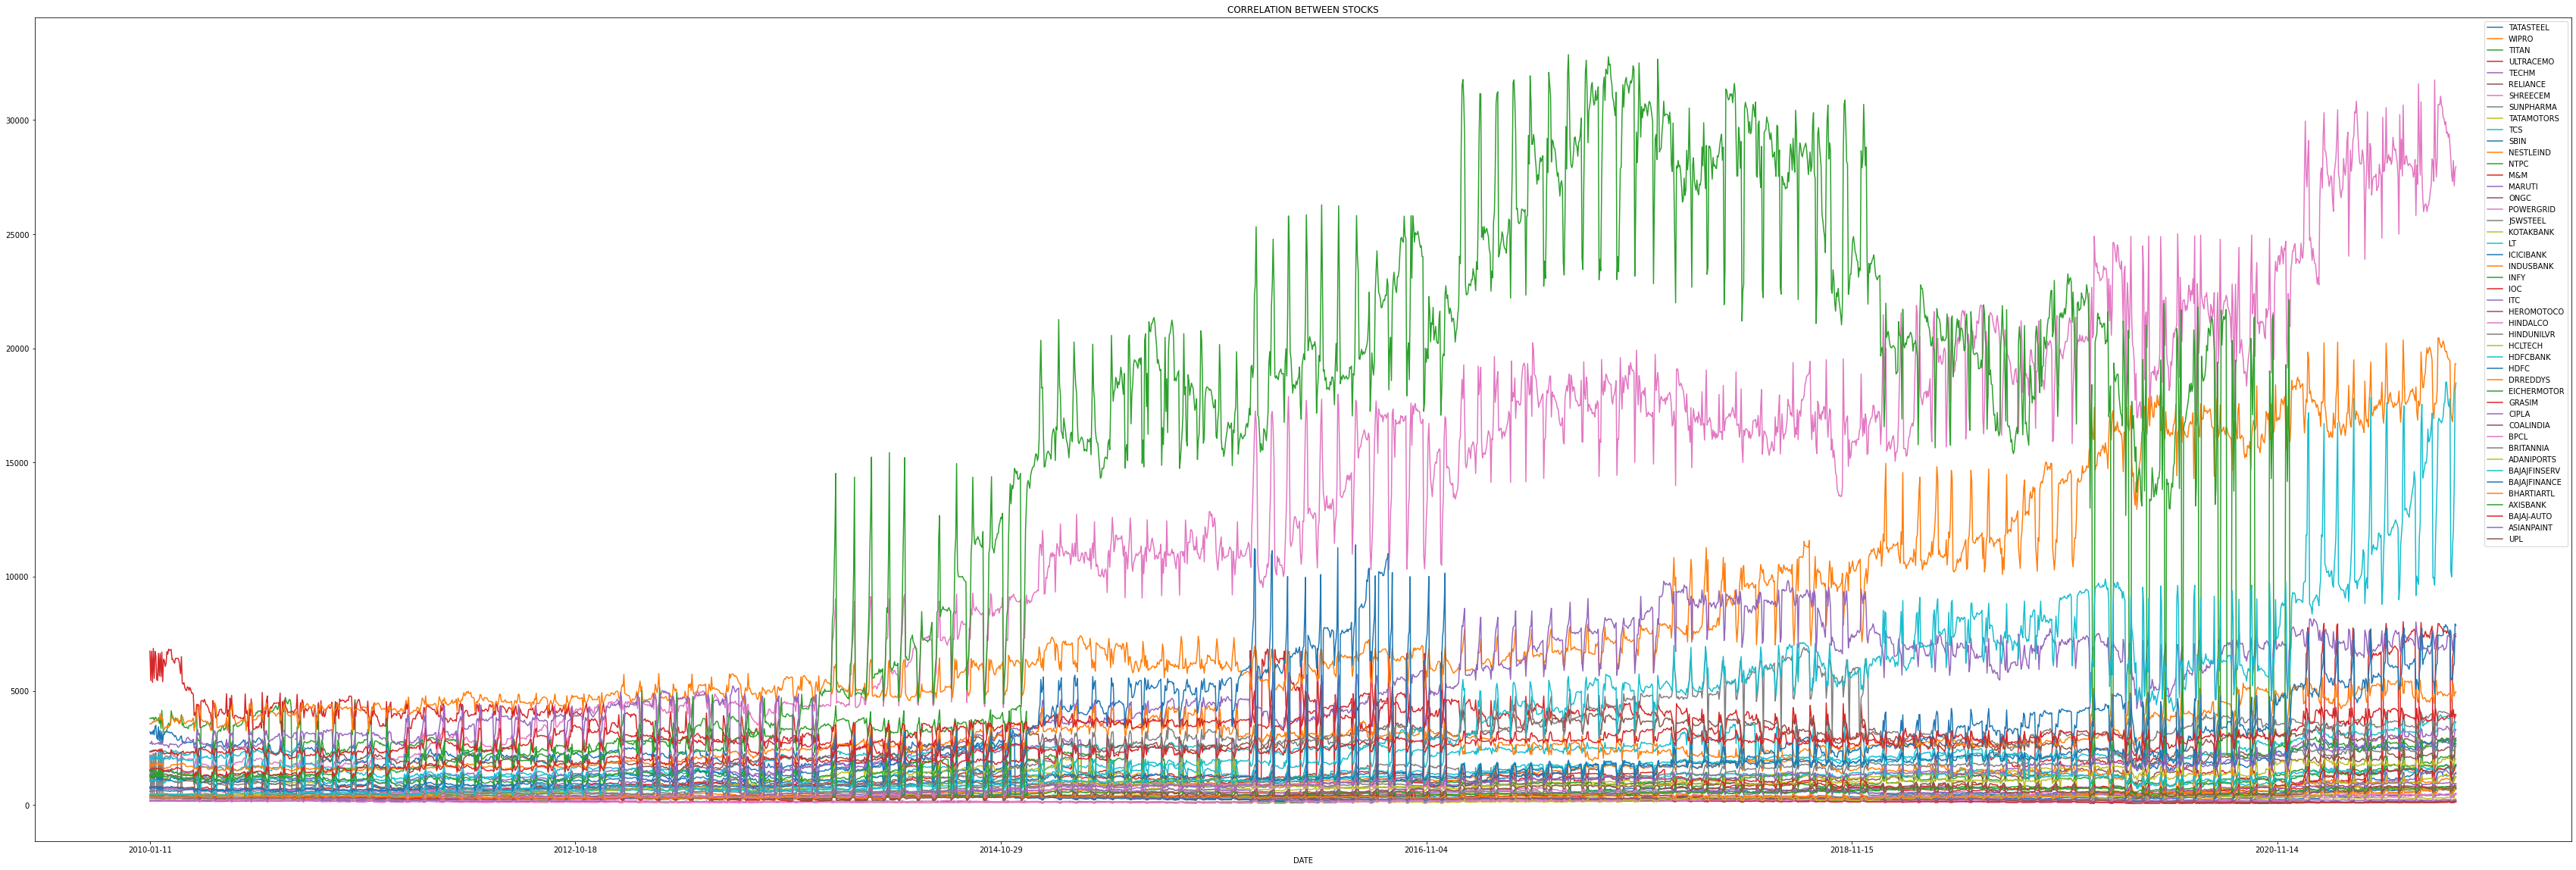

In [17]:
#Graph 1
nifty_50_data.plot(x='DATE',label=list(nifty_50_data.iloc[:,1:]),figsize=(60,20))
plt.xlabel('DATE')
plt.title('CORRELATION BETWEEN STOCKS')
plt.show()

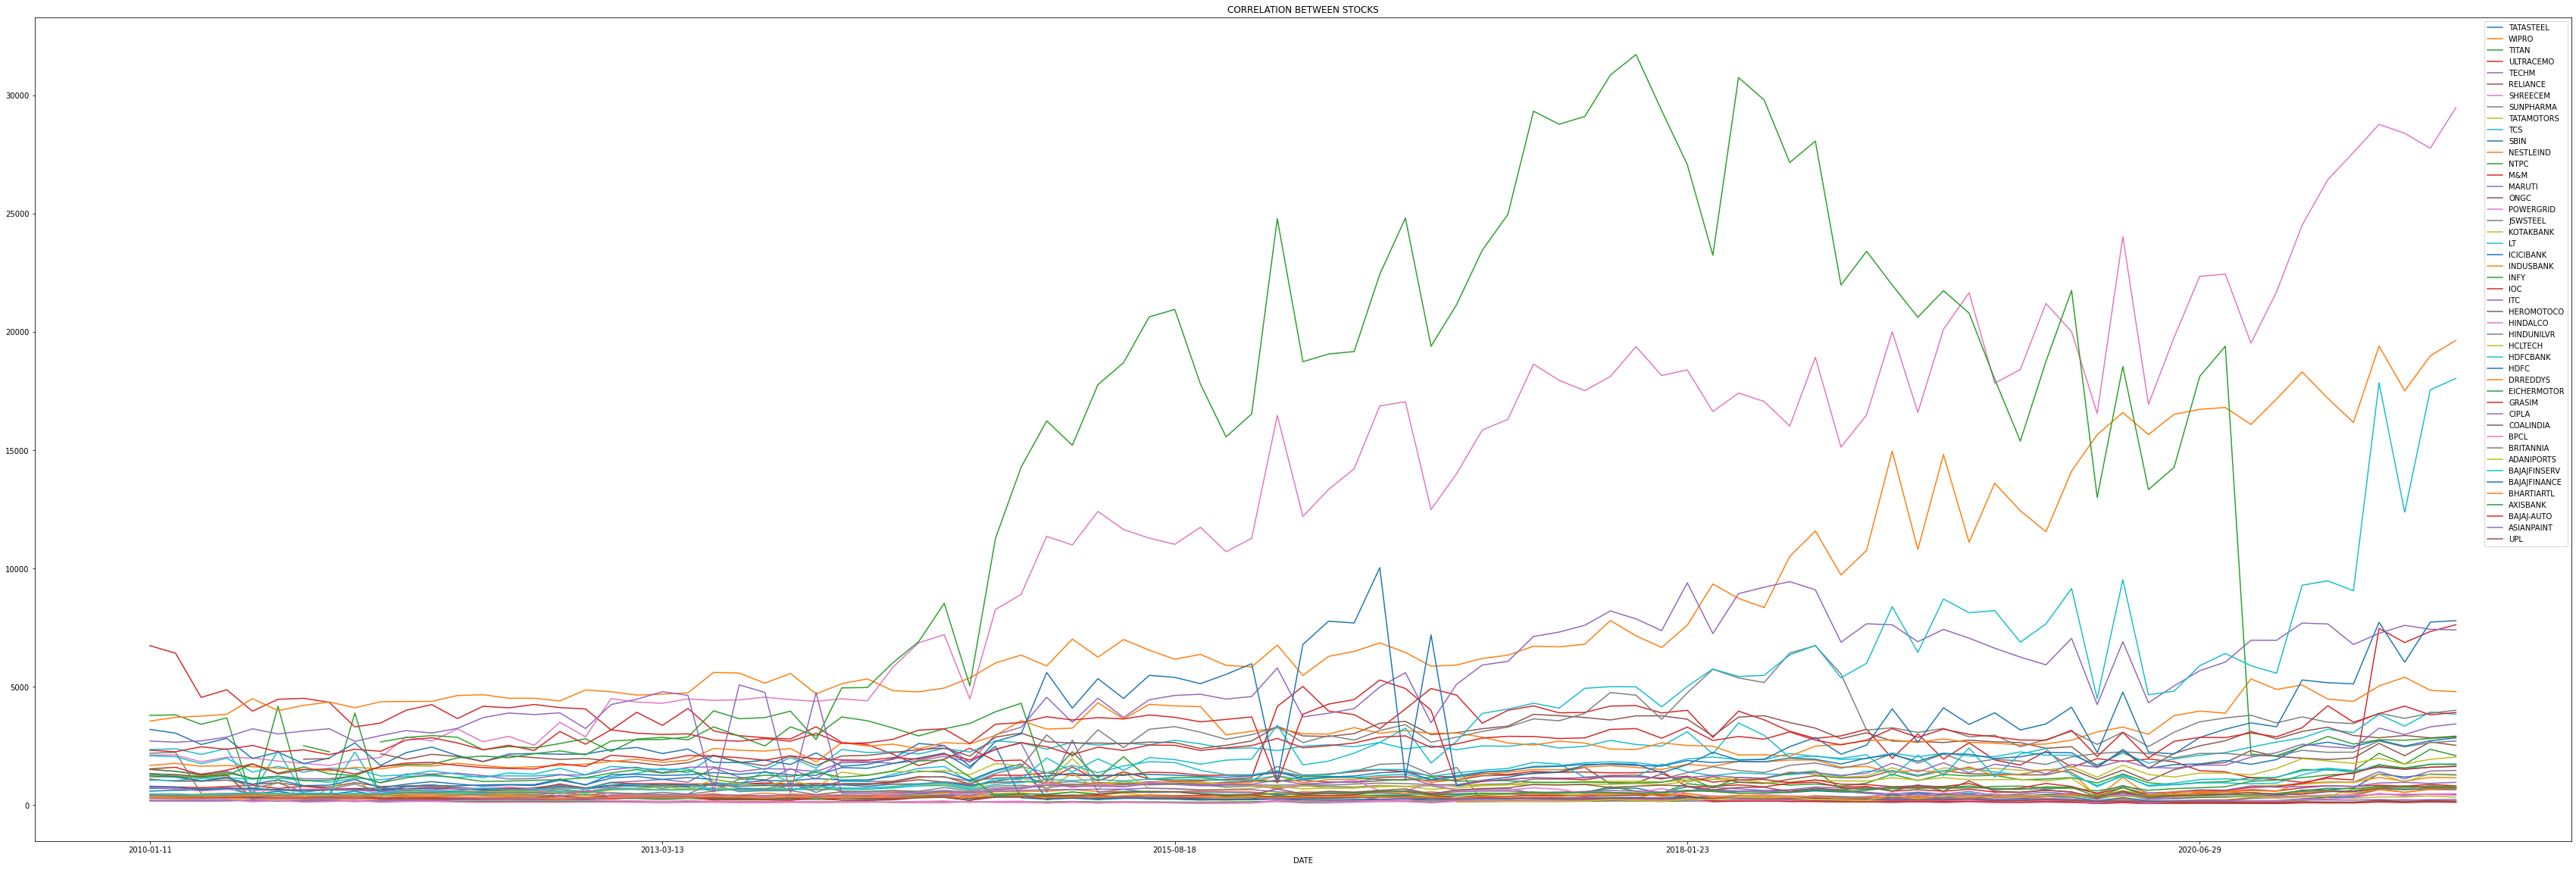

In [18]:
nifty_50_data_mon=pd.DataFrame()
for i in range(0,len(nifty_50_data),30):
    nifty_50_data_mon=nifty_50_data_mon.append(nifty_50_data.iloc[i,:], ignore_index=True)
nifty_50_data_mon.plot(x='DATE',label=list(nifty_50_data_mon.iloc[:,1:]),figsize=(60,20))
plt.xlabel('DATE')
plt.title('CORRELATION BETWEEN STOCKS')
plt.show()

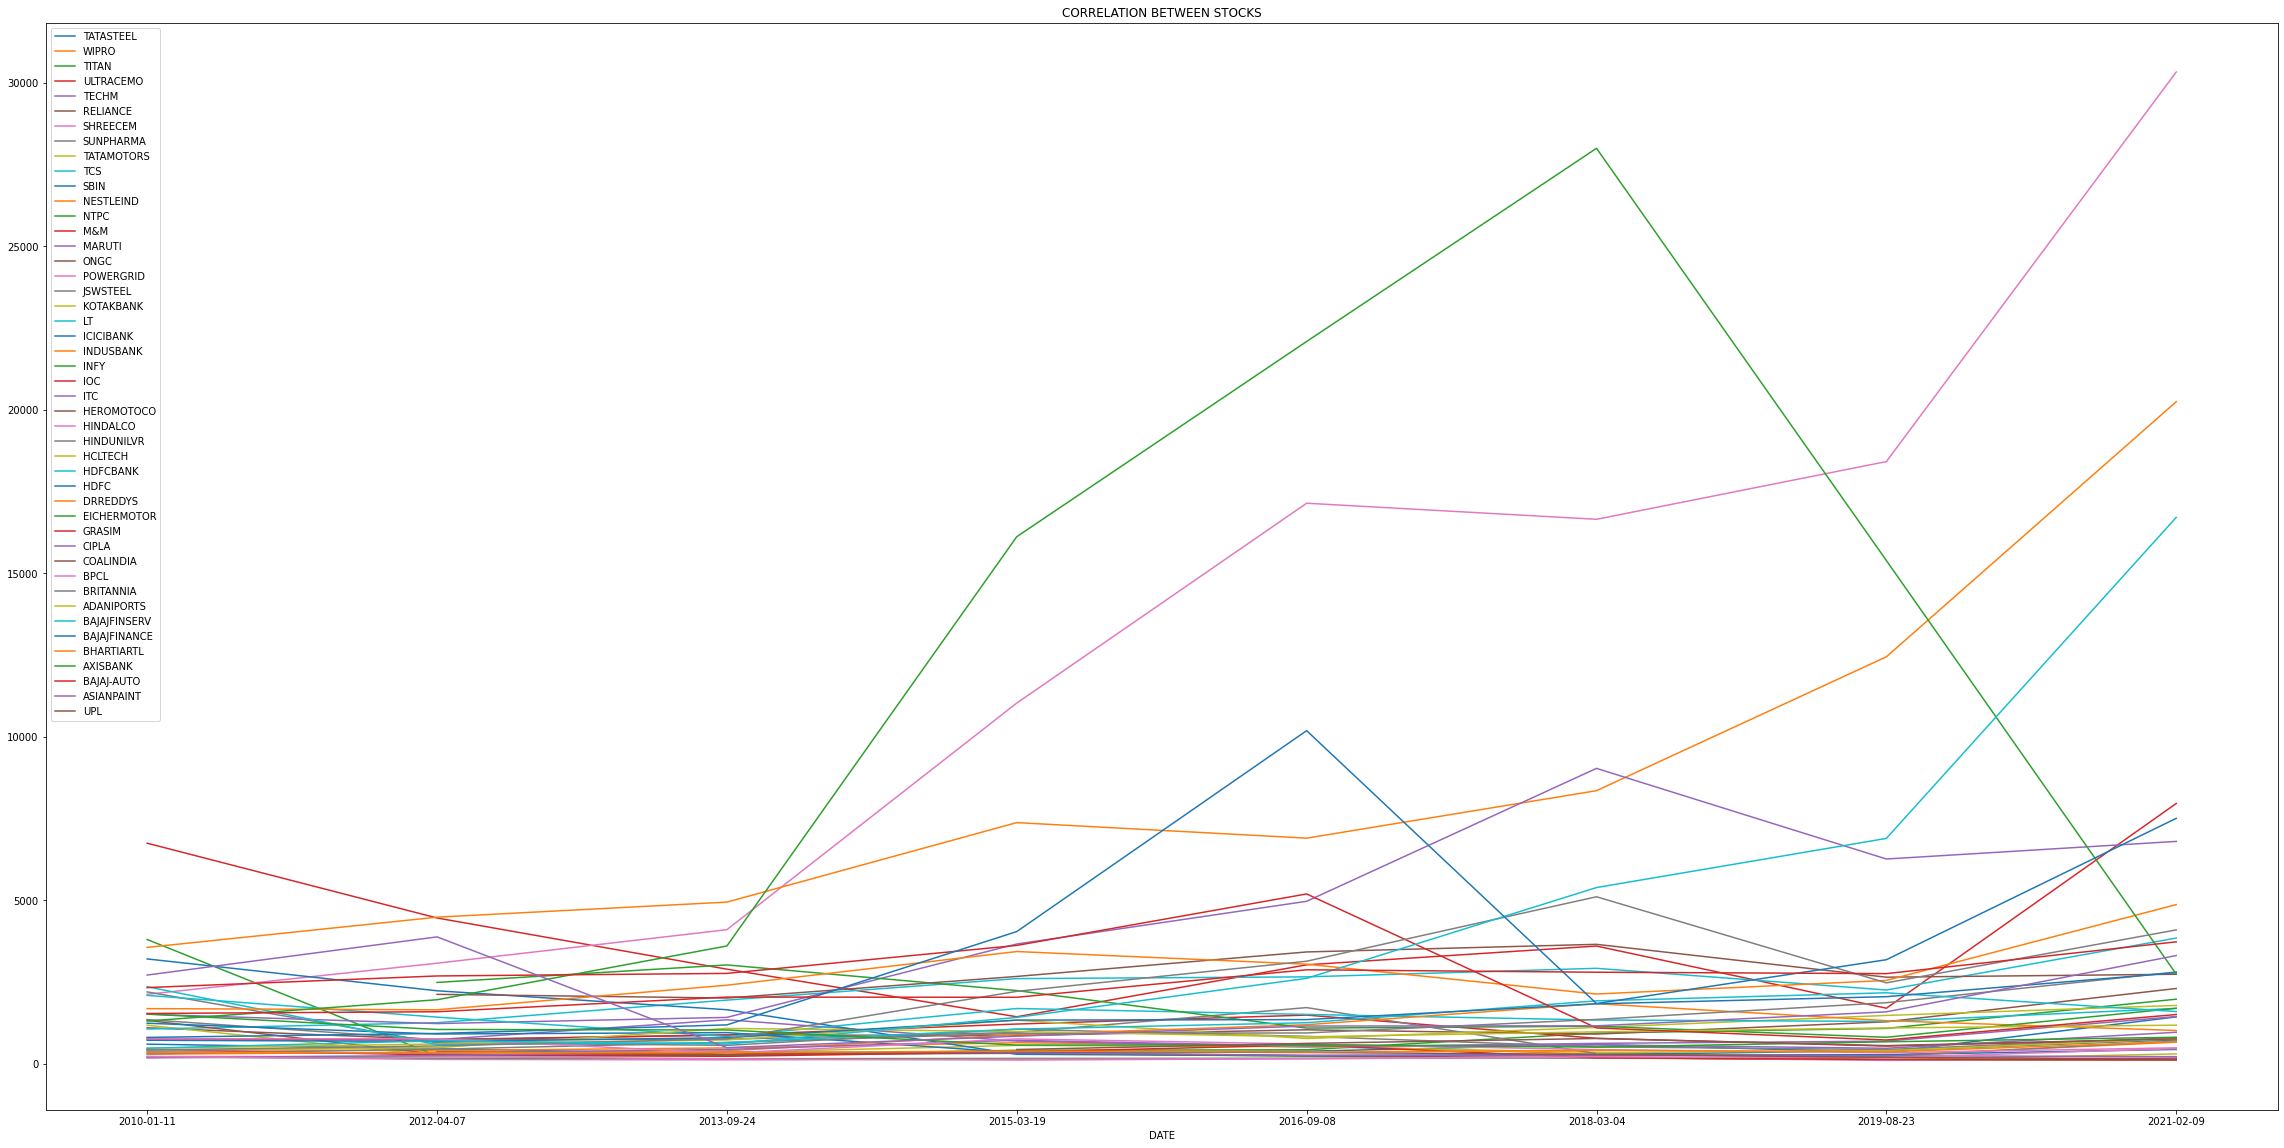

In [19]:
nifty_50_data_yr=pd.DataFrame()
for i in range(0,len(nifty_50_data),365):
    nifty_50_data_yr=nifty_50_data_yr.append(nifty_50_data.iloc[i,:], ignore_index=True)
nifty_50_data_yr.plot(x='DATE',label=list(nifty_50_data_yr.iloc[:,1:]),figsize=(40,20))
plt.xlabel('DATE')
plt.title('CORRELATION BETWEEN STOCKS')
plt.show()